<a href="https://colab.research.google.com/github/cleitonmoya/MAE001_Trabalho2/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAE001 - Projeto \#2 

**MAE001 - Modelagem Matemática em Finanças I**

**Professor**: Marco A. Cabral

**Alunos**:
* Cleiton Moya de Almeida
* Gustavo Maciel Ribeiro
* Renato Santana


## Introdução

O objetivo deste trabalho é explorar a Teoria de Markowitz e Modelo CAPM para a otimização de carteiras de renda variável. Exploramos também o a gestão de risco através da análise de VaR (valor em risco) através dos métodos histórico e da variância.

## Importação das Séries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
pd.reset_option('display.float_format')
np.set_printoptions(precision=2)
pd.options.display.precision = 2

In [ ]:
# Séries financeiras
dir = 'https://raw.githubusercontent.com/cleitonmoya/MAE001_Trabalho2/main/series/'
series = ['IBOV', 'BBDC4', 'ITUB4', 'CSNA3', 'GGBR4', 'B3SA3',
                  'PETR4', 'MGLU3', 'ABEV3', 'WEGE3', 'VIVT4']
url = dir + 'IBOV' + '.csv'

# Cria primeiro um dataframe somente com o IBOV
df = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data', 'Fechamento'], header=0)
df.columns=['IBOV']

# Carrega as demais séries para o dataframe
for _,ativo in enumerate(series):
  url = dir + ativo + '.csv'
  df[ativo] = pd.read_csv(url, decimal=',', sep=';', index_col=0, dayfirst=True, parse_dates=True, usecols=['Data','Fechamento'])

# Ordena o dataframe por data crescente (a fim de permitir correta localização)
df.sort_index(inplace=True) 
df = df.loc['2015-01-01':'2019-12-31'] # período analisado

Visualização das séries importadas:

In [ ]:
df

,IBOV,BBDC4,ITUB4,CSNA3,GGBR4,B3SA3,PETR4,MGLU3,ABEV3,WEGE3,VIVT4
Data,,,,,,,,,,,
2015-01-02,48512.22,13.01,13.81,4.21,8.40,7.88,8.79,0.22,13.95,10.82,31.81
2015-01-05,47516.82,13.04,13.88,4.05,8.04,7.65,8.08,0.23,13.64,10.76,31.68
2015-01-06,48000.92,13.46,14.11,4.32,8.94,7.72,7.82,0.22,14.04,10.59,31.40
2015-01-07,49462.91,14.00,14.62,4.79,9.61,8.05,8.14,0.23,14.38,10.58,31.98
2015-01-08,49943.30,14.07,14.85,4.68,9.43,7.97,8.62,0.23,14.43,10.71,32.31
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,115121.08,32.13,35.24,13.79,19.12,47.23,29.91,12.13,18.91,33.62,54.29
2019-12-23,115863.29,32.33,35.56,14.51,19.43,45.08,30.15,12.16,18.96,33.55,54.78
2019-12-26,117203.20,32.73,36.10,14.48,19.85,44.87,30.55,12.25,19.22,34.60,55.26


## Questão 1

Bala de Markowitz

A teoria de Markowitz nos auxilia a alocar de forma ótima os recursos financeiros entre diversos ativos e tem como objetivo obter o melhor retorno com o menor risco possível, para o caso de a quantidade de ativos serem maiores que 2 o risco pode ser calculado através da matriz de covariância dos ativos. Como o risco foi medido em variância no gráfico aparecerá uma parábola.
  A parábola que aparecerá no gráfico é chamada bala de Markowitz.


### Método: sorteio dos parâmetros

#### 2 Ativos

Primeiramente foi traçado a bala de Markowitz para 2 ativos, também foi checado se a matriz de covariância é positivo definida. Como resultado obtivemos o gráfico abaixo onde é possível observar a parábola/bala de Makowitz.




Sorteio dos parâmetros:

In [ ]:
seed = 21
random.seed(seed)
retorno_X = random.randint(0,100)/100
retorno_Y = random.randint(0,100)/100

stdX = random.randint(0,100)/100
stdY = random.randint(0,100)/100

corrXY = np.random.randint(-100,100)/100

In [ ]:
print(retorno_X,retorno_Y,stdX,stdY,corrXY)

0.21 0.53 0.88 0.53 -0.97


Matriz de convariâncias:

In [ ]:
covXY = corrXY*stdX*stdY
Cov = np.array([[stdX**2,  covXY, ],
                [covXY,    stdY**2]])
print(Cov)

[[ 0.77 -0.45]
 [-0.45  0.28]]


Verificando se a matriz é semi-definida positiva:

In [ ]:
if np.any(np.linalg.eigvals(Cov) == 0):
  print('Autovalor negativo!')
else: 
  print('Autovalores positivos!')

Autovalores positivos!


In [ ]:
peso_x = np.linspace(0,1,100)
retorno_carteira = []
risco_carteira = []
sharpe_carteira = np.array([])

for i in peso_x:
    j = 1-i
    retorno_carteira += [i *retorno_X + j*retorno_Y]
    risco_carteira += [((i*stdX)**2 + (j*stdY)**2 + 2*(j*stdY)*(i*stdX)*corrXY)**0.5]
    s = np.array(retorno_carteira) / np.array(risco_carteira)
sharpe_carteira = np.append(sharpe_carteira, s)

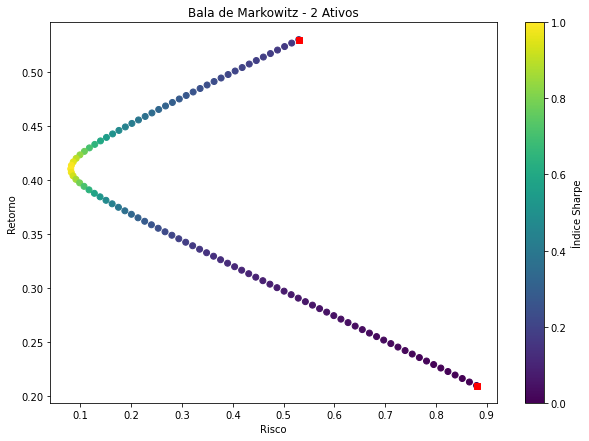

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(risco_carteira, retorno_carteira, c=sharpe_carteira, cmap='viridis')
plt.scatter(risco_carteira[0],retorno_carteira[0], c='r', marker='s')
plt.scatter(risco_carteira[-1],retorno_carteira[-1], c='r', marker='s')
plt.colorbar(label='Índice Sharpe')
plt.title('Bala de Markowitz - 2 Ativos')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.show()

#### 3 Ativos

Simulação das carterias para a Bala de Markowitz:

Posteriormente, foi traçado a bala de Markowitz para 3 ativos, novamente foi verificado que a matriz de covariância é positiva definida.
Foi obtido a bala de Markowitz no gráfico, que nesse caso se parece com uma parábola, é possível observar as diversas combinações dos ativos e encontrar a combinação que gere maior retorno com menor risco possível. Também é possível observar a fronteira eficiente da bala de Markowitz que de fato é onde encontram-se as melhores combinações de ativos.


In [ ]:
seed = 37
np.random.seed(seed)
random.seed(seed)

retorno_X = random.randint(0,100)/100
retorno_Y = random.randint(0,100)/100
retorno_Z = random.randint(0,100)/100
R = np.array([retorno_X, retorno_Y, retorno_Z])

stdX = random.randint(0,100)/100
stdY = random.randint(0,100)/100
stdZ = random.randint(0,100)/100
Std = np.array([stdX, stdY, stdZ])

corrXY = np.random.randint(-100,100)/100
corrXZ = np.random.randint(-100,100)/100
corrYZ = np.random.randint(-100,100)/100

print(retorno_X,retorno_Y,retorno_Z,stdX,stdY,stdZ,corrXY,corrXZ,corrYZ)

0.87 0.77 0.11 0.79 0.85 0.95 0.43 0.07 -0.24


Matriz de covariância:

In [ ]:
covXY = corrXY*stdX*stdY
covXZ = corrXZ*stdX*stdZ
covYZ = corrYZ*stdY*stdZ

Cov = np.array([[stdX**2,  covXY,     covXZ],
                [covXY,    stdY**2,   covYZ],
                [covXZ,    covYZ,     stdZ**2]])

print(Cov)

[[ 0.62  0.29  0.05]
 [ 0.29  0.72 -0.19]
 [ 0.05 -0.19  0.9 ]]


Verificando se é semi-definida positiva:

In [ ]:
if np.any(np.linalg.eigvals(Cov) == 0):
  print('Autovalor negativo!')
else: 
  print('Autovalores positivos!')

Autovalores positivos!


In [ ]:
N_por = 10000 # número de carteiras simuladas
Retorno = np.array([])
Risco = np.array([])
Sharpe = np.array([])

for n in range(N_por):
  P = np.random.dirichlet(np.ones(3))           # Peso de cada carteira
  Retorno = np.append(Retorno, R@P)             # Retorno das carteiras
  Risco = np.append(Risco, np.sqrt(P.T@Cov@P))  # Risco (Std) das carteiras
  Sharpe = Retorno/Risco

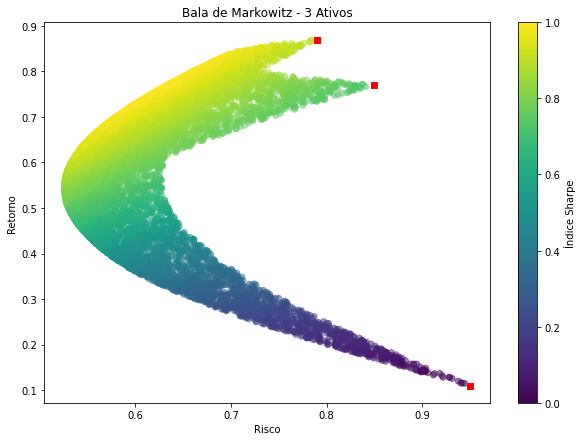

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(Risco, Retorno, alpha=0.5, c=Sharpe, cmap='viridis')
plt.scatter(Std, R, c='r', marker='s')
plt.colorbar(label='Índice Sharpe')
plt.title('Bala de Markowitz - 3 Ativos')
plt.xlabel('Risco')
plt.ylabel('Retorno')
plt.show()


Por fim, gerando simulações de muitas carteiras foi obtido a bala de Markowitz  e verificado diversas combinações de ativos onde é possível selecionar a melhor combinação de acordo com o risco e retorno. É importante observar que as carteiras que se encontram na fronteira eficiente da bala de Markowitz possuem o maior índice de Sharpe, esse índice é determinado para possamos classificar os ativos com melhores risco-retorno.


### Método: sorteio das séries

Gera séries de retornos (diários) diários aleatórios: 

In [ ]:
mu_min = 1e-3
mu_max = 5e-3
std_min = 1e-2
std_max = 3e-2

N = 7 # Número de ativos
seed = 39
# (5,42), (7, 39), (7, 37), 
T = 252 # período da série

# Gera série de retorno normal
def geraRetorno():
  mu = np.random.uniform(mu_min, mu_max)
  std = np.random.uniform(std_min, std_max)
  for t in range(T):
    R = np.random.normal(loc=mu, scale=std, size=T)
  return R

random.seed(seed)
np.random.seed(seed)
X = geraRetorno()
while (X.mean() < 0):
  X = geraRetorno()

dfX = pd.DataFrame(X.T, np.arange(1,T+1))
for n in range(1,N):
  X = geraRetorno()
  while (X.mean() < 0):
    X = geraRetorno()
  dfX[n] = X

# Nomeia os ativos (A, B, C...)
import string
ativos = list(string.ascii_uppercase)[:N]
dfX.rename(columns=dict(zip(range(N), ativos)), inplace=True)

Matriz de covariância:

In [ ]:
dfX.cov()

,A,B,C,D,E,F,G
A,7.15e-04,4.20e-05,-6.10e-05,3.30e-06,-3.45e-05,-8.93e-06,8.02e-06
B,4.20e-05,8.07e-04,-3.77e-05,-1.86e-05,-1.94e-05,-7.37e-07,-2.51e-05
C,-6.10e-05,-3.77e-05,7.31e-04,3.57e-05,2.00e-05,-1.48e-05,5.66e-06
D,3.30e-06,-1.86e-05,3.57e-05,5.18e-04,-1.71e-05,1.44e-07,7.20e-06
E,-3.45e-05,-1.94e-05,2.00e-05,-1.71e-05,2.05e-04,5.35e-06,-8.08e-06
F,-8.93e-06,-7.37e-07,-1.48e-05,1.44e-07,5.35e-06,3.63e-04,-2.03e-05
G,8.02e-06,-2.51e-05,5.66e-06,7.20e-06,-8.08e-06,-2.03e-05,1.11e-04


Verificando se a matriz é semi-definida positiva (todos autovalores positivos):

In [ ]:
if np.any(np.linalg.eigvals(dfX.cov().to_numpy()) == 0):
  print('Autovalor negativo!')
else: 
  print('Autovalores positivos!')

Autovalores positivos!


Índice Sharpe:

In [ ]:
X_anual = (1+dfX.mean())**252-1   # retorno médio anualizado
Std_anual = dfX.std()*np.sqrt(252)
Var_anual = dfX.var()*252

dfS = pd.DataFrame(X_anual, columns=['Retorno'])
dfS['Risco_Std'] = Std_anual
dfS['Risco_Var'] = Var_anual
dfS['Sharpe'] = dfS.apply(lambda x: x['Retorno']/x['Risco_Std'],axis=1)
dfS

,Retorno,Risco_Std,Risco_Var,Sharpe
A,3.45,0.42,0.18,8.14
B,0.78,0.45,0.20,1.74
C,0.16,0.43,0.18,0.37
D,1.27,0.36,0.13,3.50
E,0.82,0.23,0.05,3.62
F,0.81,0.30,0.09,2.68
G,1.66,0.17,0.03,9.91


Simulação de carteiras:

In [ ]:
N_por = 10000 # número de carteiras simuladas
Cov = dfX.cov().to_numpy()*252
R = dfS['Retorno'].to_numpy() 
np.random.seed(42)
X = np.array([])
Std = np.array([])
for n in range(N_por):
  P = np.random.dirichlet(np.ones(N))
  X = np.append(X, R@P)                         # Retorno das carteiras
  Std = np.append(Std, np.sqrt(P.T@Cov@P))      # Risco (Std) das carteiras
S = X/Std # Índice Sharpe das Carteiras

Bala de Markowitz:

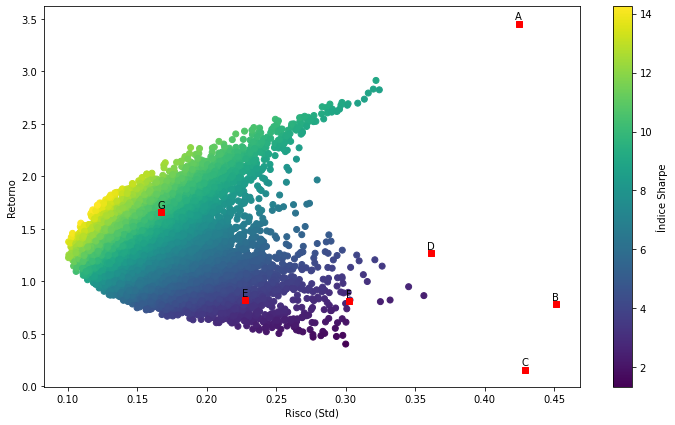

In [ ]:
# Plota as carteiras simuladas
plt.figure(figsize=(12,7))
plt.xlabel('Risco (Std)')
plt.ylabel('Retorno')  
plt.scatter(Std, X, c=S, cmap='viridis')
plt.colorbar(label='Índice Sharpe')

# Plota as carteiras mono-ativo
plt.scatter(dfS.Risco_Std, dfS.Retorno, marker='s', color='r')
for label, x, y in zip(ativos, dfS['Risco_Std'], dfS['Retorno']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 2),
        textcoords='offset points', ha='center', va='bottom')
plt.show()

## Questão 2

Foram usadas 4 séries temporais de ações para analisar a correlação através dos gráficos de dispersão, duas das séries foram do setor financeiro e duas do setor de siderurgia.

* Setor Financeiro:
   * Banco Bradesco (BBDC4);
   * Banco Itaú-Unibanco (ITUB4);
* Setor de Siderurgia:
   * Companhia Siderúrigica Nacional (CSNA3)
   * Grupo Gerdau (GGBR4)
 


Cálculo do retorno percentual:

In [ ]:
df_ret = df.pct_change().iloc[1:,:] # matriz de retornos

Análise de correlação das ações com o IBOV:

Primeiramente, foi feita uma comparação das séries temporais das ações supracitadas com o índice IBOVESPA(IBOV).  Foi possível observar uma forte correlação das ações das empresas do setor bancário(BBDC4, ITUBA4) com o índice IBOV enquanto que as ações do setor de siderurgia possuem menor correlação. Essa observação foi feita através da reta de regressão linear, ambos os ativos tem correlação positiva com o IBOV, porém, as ações do setor financeiro tem maior correlação, pois observa-se que os pontos ficam mais próximos da reta de regressão linear.

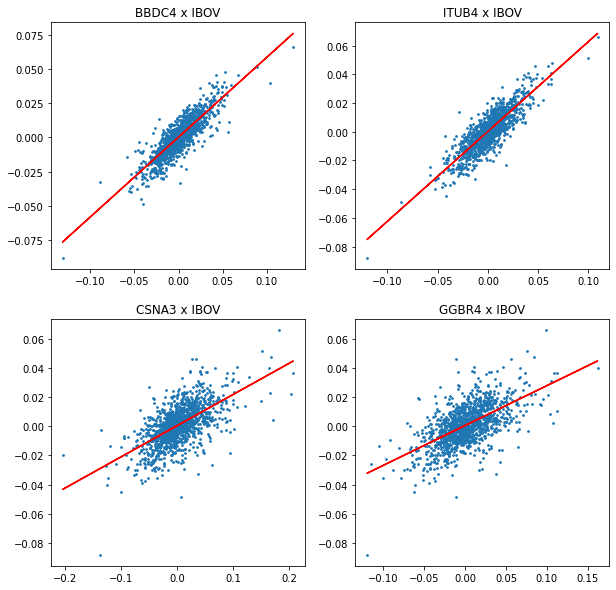

In [ ]:
from scipy.stats import linregress
df_ret = df.pct_change().iloc[1:,:] # matriz de retornos

fig, axs = plt.subplots(2, 2,figsize=(10,10))
y = df_ret.IBOV
x = df_ret.BBDC4
axs[0,0].set_title('BBDC4 x IBOV')
axs[0,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,0].plot(x, m*x+b, c='r')

x = df_ret.ITUB4
axs[0,1].set_title('ITUB4 x IBOV')
axs[0,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,1].plot(x, m*x+b, c='r')

x = df_ret.CSNA3
axs[1,0].set_title('CSNA3 x IBOV')
axs[1,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,0].plot(x, m*x+b, c='r')

x = df_ret.GGBR4
axs[1,1].set_title('GGBR4 x IBOV')
axs[1,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,1].plot(x, m*x+b, c='r')

plt.show()

Podemos observar que os 4 ativos escolhidos possuem correção positiva com **IBOV**, sendo que **BBDC4** e **ITUB4** possuem correlação maior.

Análise de ativos ativos do mesmo setor:

Posteriormente, foi comparado no gráfico de dispersão os ativos do mesmo setor, ou seja, BBDC4 x ITUB4 e CSNA3 x GGBR4.

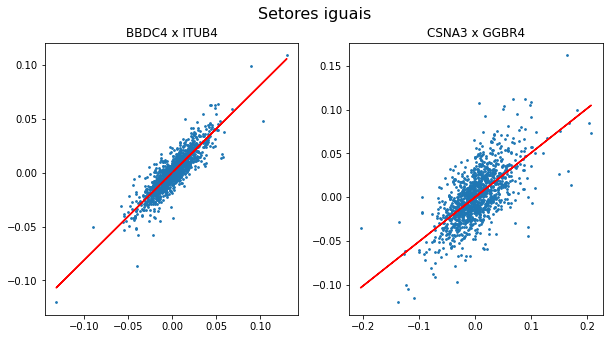

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Setores iguais', fontsize=16)
axs[0].set_title('BBDC4 x ITUB4')
x = df_ret.BBDC4
y = df_ret.ITUB4
axs[0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0].plot(x, m*x+b, c='r')


axs[1].set_title('CSNA3 x GGBR4')
x = df_ret.CSNA3
y = df_ret.GGBR4
axs[1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1].plot(x, m*x+b, c='r')
plt.show()

Foi possível observar que **BBDC4** e **ITUB4** possuem forte correlação, pois, novamente, é possível ver que os pontos ficam próximos da reta de regressão linear. 
Já as empresas do setor de siderurgia **CSNA3** e **GGBR4** possuem menor correlação, pois os pontos do gráfico ficam um pouco mais longe da reta de regressão linear.


Ações de setores diferentes:

Também foi feita uma comparação com as ações de empresas de setores diferentes:

(**BBDC4 x CSNA3**), (**BBDC4** x **GGBR4**), (**ITUB4** x **CSNA3**), (**ITUB4** x **GGBR4**).

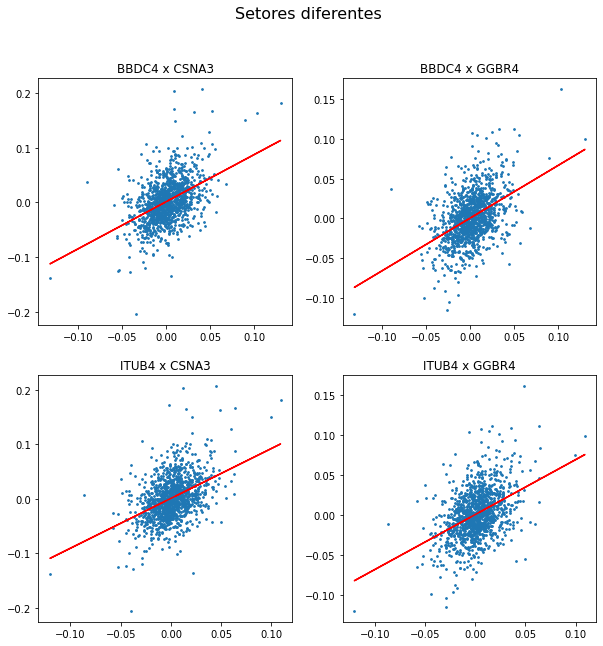

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Setores diferentes', fontsize=16)
axs[0,0].set_title('BBDC4 x CSNA3')
x = df_ret.BBDC4
y = df_ret.CSNA3
axs[0,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,0].plot(x, m*x+b, c='r')

axs[0,1].set_title('BBDC4 x GGBR4')
y = df_ret.GGBR4
axs[0,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[0,1].plot(x, m*x+b, c='r')

axs[1,0].set_title('ITUB4 x CSNA3')
x = df_ret.ITUB4
y = df_ret.CSNA3
axs[1,0].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,0].plot(x, m*x+b, c='r')

axs[1,1].set_title('ITUB4 x GGBR4')
y = df_ret.GGBR4
axs[1,1].scatter(x, y, s=3)
m, b, corr, _, _ = linregress(x, y)
axs[1,1].plot(x, m*x+b, c='r')
plt.show()

As ações das empresas dos setores de siderurgia possuem baixa correlação com as ações das empresas do setor financeiro, é possível observar que os pontos ficam bem mais espalhados no gráfico e longe da linha de regressão linear.



As correlações foram calculadas de acordo com a definição 6.6 pág 139 do livro Finanças matemática teoria e prática que é :

**CORR[X,Y] = COV[X,Y]/StDev[X].StDev[Y]**

De acordo com o lema 6.7 do mesmo livro e pág.  Para toda a v.a X e Y  a Corr[X,Y] é um número de entre -1 e 1.  Abaixo foi encontra-se um mapa de calor para melhor observação das correlações entre as ações e também o IBOV.


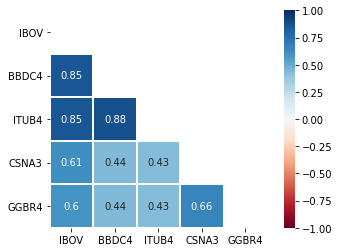

In [ ]:
M_Cor = df_ret.iloc[:,:5].corr()
mask = np.triu(np.ones_like(M_Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(M_Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, annot=True, square=True)
plt.yticks(rotation=0) 
plt.show()

## Questão 3

Ativos escolhidos:
* BBDC4 - Bradesco
* ITUB4 - Itaú-Unibanco
* CSNA3 - CSN
* GGBR4 - Grupo Gerdau
* B3SA3 - B3
* PETR4 - Petrobras
* MGLU3 - Magazine Luíza
* ABEV3 - Ambev
* WEGE3 - WEG
* VIVT4 - Vivo

Índice Sharpe dos ativos:

In [ ]:
df_X = df.pct_change().iloc[1:,1:] # matriz de retornos diários

X_anual = (1+df_X.mean())**252-1   # retorno médio anualizado
Std_anual = df_X.std()*np.sqrt(252)
Var_anual = df_X.var()*252

df_S = pd.DataFrame(X_anual, columns=['Retorno'])
df_S['Risco_Std'] = Std_anual
df_S['Risco_Var'] = Var_anual
df_S['Sharpe'] = df_S.apply(lambda x: x['Retorno']/x['Risco_Std'],axis=1)
df_S

,Retorno,Risco_Std,Risco_Var,Sharpe
BBDC4,0.27,0.32,0.10,0.84
ITUB4,0.27,0.30,0.09,0.90
CSNA3,0.56,0.63,0.40,0.88
GGBR4,0.34,0.48,0.23,0.70
B3SA3,0.48,0.33,0.11,1.46
PETR4,0.46,0.50,0.25,0.91
MGLU3,2.11,0.81,0.66,2.60
ABEV3,0.09,0.22,0.05,0.40
WEGE3,0.32,0.28,0.08,1.13
VIVT4,0.15,0.25,0.06,0.61


Matriz de covariância:

In [ ]:
df_X.cov()*252

,BBDC4,ITUB4,CSNA3,GGBR4,B3SA3,PETR4,MGLU3,ABEV3,WEGE3,VIVT4
BBDC4,0.10,0.08,0.09,0.07,0.07,0.10,0.06,0.03,0.04,0.04
ITUB4,0.08,0.09,0.08,0.06,0.06,0.09,0.06,0.03,0.04,0.03
CSNA3,0.09,0.08,0.40,0.20,0.08,0.15,0.10,0.04,0.04,0.04
GGBR4,0.07,0.06,0.20,0.23,0.06,0.11,0.07,0.03,0.04,0.03
B3SA3,0.07,0.06,0.08,0.06,0.11,0.09,0.06,0.03,0.03,0.03
PETR4,0.10,0.09,0.15,0.11,0.09,0.25,0.09,0.03,0.04,0.05
MGLU3,0.06,0.06,0.10,0.07,0.06,0.09,0.66,0.03,0.05,0.03
ABEV3,0.03,0.03,0.04,0.03,0.03,0.03,0.03,0.05,0.02,0.02
WEGE3,0.04,0.04,0.04,0.04,0.03,0.04,0.05,0.02,0.08,0.02
VIVT4,0.04,0.03,0.04,0.03,0.03,0.05,0.03,0.02,0.02,0.06


Matriz de correlação:

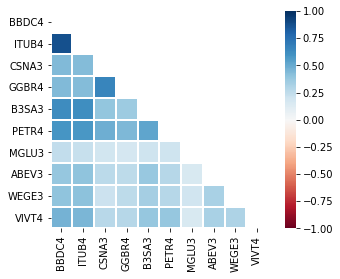

In [ ]:
Cor = df_X.corr()
mask = np.triu(np.ones_like(Cor, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(Cor, mask=mask, vmin=-1, vmax=+1, cmap='RdBu', linewidths=1, square=True) 
plt.show()

### Carteira Ótima

Para encontrar a carteira ótima, maximizamos o Índice Sharpe utilizando como restrição somente o percentual e limite dos ativos de cada carteira (soma deve ser 1)>

Como o SciPy não possui função de maximização, fizemos a minimização do negativo da Índice Sharpe.
  
  Foi verificado uma concentração de poucos ativos na carteira ótima, isso ja era esperado pela tendência do modelo que acaba contradizendo a ideia de diversificação de ativos na carteiras.

In [ ]:
from scipy.optimize import minimize

Cov = df_X.cov().to_numpy()*252         # Matriz de covariância dos retornos anualizados
R = df_S['Retorno'].to_numpy()          # Retorno médio de cada ativo carteira

# Retorno esperado
def ret_esp(p):
  ret = R @ p
  return ret

def risco_esp(p):
  risco = np.sqrt(p.T @ Cov @ p)
  return risco

def neg_sharpe(p):
    ret = R @ p
    risco = np.sqrt(p.T @ Cov @ p)
    return -1*ret/risco

# Restrições da otimização
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1),
          (0,1), (0,1), (0,1), (0,1), (0,1))
cons = ({'type':'eq', 'fun': lambda p: p.sum()-1})
p0 = [0.10]*10

result = minimize(neg_sharpe, p0, method='SLSQP', bounds=bounds, constraints=cons)
p_otm = result['x']
pd.DataFrame(p_otm.round(2), series[1:], columns=['%'])

,%
BBDC4,0.00
ITUB4,0.00
CSNA3,0.01
GGBR4,0.00
B3SA3,0.37
PETR4,0.00
MGLU3,0.43
ABEV3,0.00
WEGE3,0.19
VIVT4,0.00


In [ ]:
p_otm_ret = R@p_otm
p_otm_std = np.sqrt(p_otm.T@Cov@p_otm)
print('Retorno:', p_otm_ret)
print('Risco:', p_otm_std)

Retorno: 1.1481172338880525
Risco: 0.41153852830411874


### Carteira de variância mínima:

In [ ]:
cons = ({'type':'eq', 'fun': lambda p: p.sum()-1})
result = minimize(risco_esp, p0, method='SLSQP', bounds=bounds, constraints=cons)
p_min = result['x']
pd.DataFrame(p_min.round(2), series[1:], columns=['%'])

,%
BBDC4,0.00
ITUB4,0.01
CSNA3,0.00
GGBR4,0.00
B3SA3,0.03
PETR4,0.00
MGLU3,0.00
ABEV3,0.46
WEGE3,0.19
VIVT4,0.31


In [ ]:
p_min_ret = R@p_min
p_min_std = np.sqrt(p_min.T@Cov@p_min)
print('Retorno:', p_min_ret)
print('Risco:', p_min_std)

Retorno: 0.16450584267471738
Risco: 0.1792400346475971


### Fronteira Eficiente:

In [ ]:
carteiras_otm = []
ef_x = np.array([])
ef_y = np.linspace(p_min_ret, df_S.Retorno.max(),200)

# Minimização do risco
for ret in ef_y:
    cons = ({'type':'eq', 'fun': lambda p: p.sum()-1},
            {'type':'eq', 'fun': lambda p: ret_esp(p) - ret})
    
    # minimiza o risco para cada retorno
    result = minimize(risco_esp, p0, method='SLSQP', 
                      bounds=bounds, constraints=cons)
    
    ef_x = np.append(ef_x, result['fun'])
    carteiras_otm.append(result['x'])
carteiras_otm = np.array(carteiras_otm)

### Fronteira não-eficiente

In [ ]:
nef_x = np.array([])
nef_y = np.linspace(df_S.Retorno.min(), p_min_ret, 200)
# Minimização do risco
for ret in nef_y:
    cons = ({'type':'eq', 'fun': lambda p: p.sum()-1},
            {'type':'eq', 'fun': lambda p: ret_esp(p) - ret})
    
    # minimiza o risco para cada retorno
    result = minimize(risco_esp, p0, method='SLSQP', 
                      bounds=bounds, constraints=cons)
    
    nef_x = np.append(nef_x, result['fun'])

### Bala de Markowitz:

Simulação de carteiras:

In [ ]:
N_por = 100000 # número de carteiras simuladas
np.random.seed(42)
X = np.array([])
Std = np.array([])
for n in range(N_por):
  P = np.random.dirichlet(np.ones(10))
  X = np.append(X, R@P)                         # Retorno das carteiras
  Std = np.append(Std, np.sqrt(P.T@Cov@P))      # Risco (Std) das carteiras
S = X/Std # Índice Sharpe das Carteiras

Plota a Bala de Markowitz e as fronteiras:

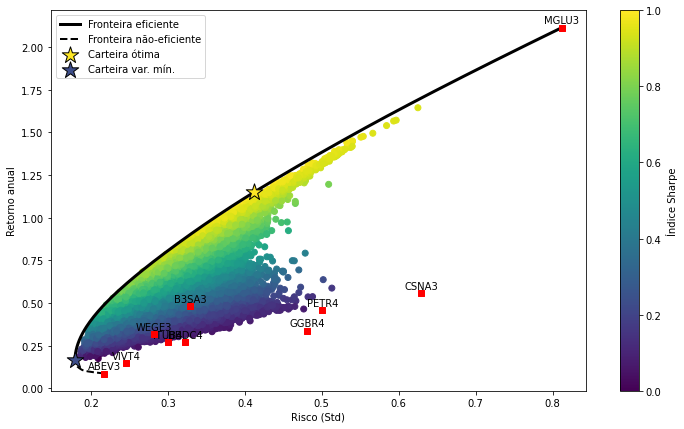

In [ ]:
# Plota as carteiras simuladas
plt.figure(figsize=(12,7))
plt.xlabel('Risco (Std)')
plt.ylabel('Retorno anual')  
plt.scatter(Std, X, c=S, cmap='viridis')

# Plota a Fronteira Eficiente
plt.plot(ef_x,ef_y, 'k', linewidth=3, label='Fronteira eficiente')

# Plota fronteira não eficiente
plt.plot(nef_x,nef_y, 'k--', linewidth=2, label='Fronteira não-eficiente')

# Plota as carteiras mono-ativo
plt.scatter(df_S.Risco_Std, df_S.Retorno, marker='s', color='r', zorder=9)
plt.colorbar(label='Índice Sharpe')
for label, x, y in zip(series[1:], df_S['Risco_Std'], df_S['Retorno']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(0, 2),
        textcoords='offset points', ha='center', va='bottom')

# Plota a carteira ótima e de variância mínima
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap 

normalize = Normalize(vmin=df_S.Sharpe.min(), vmax=df_S.Sharpe.max())
cmap = get_cmap('viridis')
cor_otm = cmap(normalize(p_otm_ret/p_otm_std))
cor_min = cmap(normalize(p_min_ret/p_min_std))

plt.scatter(p_otm_std, p_otm_ret, marker='*', color=cor_otm, edgecolors='k',
            cmap='viridis', s=300, label='Carteira ótima', zorder=10)

plt.scatter(p_min_std, p_min_ret, marker='*', color=cor_min, edgecolors='k',
            cmap='viridis', s=300, label='Carteira var. mín.', zorder=10)

plt.legend()
plt.show()

### Carteiras na Fronteira Eficiente 

Para verificar o efeito de concentração de ativos nas carteiras da fronteira efeiciente computamos, para cada valor de risco $R$, o percentual $\pi_i(R)$ de participação dos "top 5" ativos (os 5 ativos com maior peso na carteira).

In [ ]:
df_carteiras_ef = pd.DataFrame(carteiras_otm, ef_x, columns=series[1:])
C = np.array([])
for k,_ in enumerate(ef_x):
  c = df_carteiras_ef.iloc[k].sort_values(ascending=False)[:5].sum()
  C = np.append(C,c)
df_carteiras_ef['Top 5'] = C

Ativos Top 5 (com maior participação) em toda fronteira eficiente:

In [ ]:
df_top5 = df_carteiras_ef[df_carteiras_ef.columns[:-1]].sum().sort_values(ascending=False)[:5]
top5 = df_top5.index.to_list()
df_top5

MGLU3    90.67
B3SA3    48.80
WEGE3    27.27
ABEV3    17.25
VIVT4    15.63
dtype: float64

Plotamos então participação de ativos na carteira, bem como a participação dos **top 5** ao longo da fronteira efieciente:

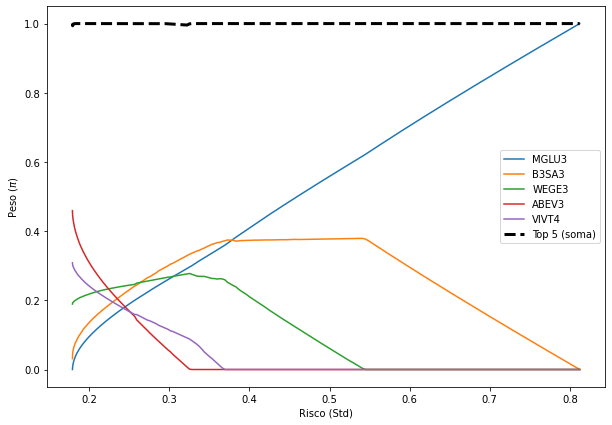

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
for k,s in enumerate(df_carteiras_ef[top5].columns.to_list()):
    ax.plot(df_carteiras_ef[s],label=s)

ax.plot(df_carteiras_ef['Top 5'], 'k--', linewidth=3, label='Top 5 (soma)')
ax.set_xlabel('Risco (Std)')
ax.set_ylabel('Peso ($\pi$)')
ax.legend()
plt.show()

Podemos visualizar que ocorre concentração dos ativos nas carteiras da fronteira eficiente.

## Questão 4

4. (análise VaR) Partindo da série histórica de algum ação (últimos 5 anos), faça uma análise
VaR com 90% e 95% de probabilidade usando o método histórico e o da variância para
retornos:
(a) diários; (b) quinzenais. Inclua os histogramas bem como uma análise dos resultados
obtidos.

### Método Histórico

#### Análise diária

Analisaremos aqui o valor de fechamento da ação BBDC4 ao longo do período de 01/01/2015 até 31/12/2019.

In [ ]:
#pegando os valores de fechamento da série história de BBDC4
h = df.BBDC4
len(h)

1234

Vamos agora, analisar qual foi o retorno diário da BBCD4 no período considerado de 5 anos

In [ ]:
#retorno diário
retorno_diario = []
for i in range(len(h)-1):
    retorno_diario += [h[i+1]/h[i] -1]


Para fazermos a análise VaR, primeiramente é necessário estudar a distribuição dos valores dos retornos diários, para isso, organizaremos esses retornos em intervalos.

In [ ]:
#organização em caixas#
p = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []

for j in retorno_diario:
    if j >= 0:
        p+= [j]
    if -0.01 <= j < 0:
        n1+= [j]
    if -0.02 <= j < -0.01:
        n2+= [j]
    if -0.025 <= j < -0.02:
        n3+= [j]
    if -0.03 <= j < -0.025:
        n4+= [j]
    if  -0.0435 <= j < -0.03:
        n5+= [j]
    if  j < -0.0435:
        n6+= [j]
l = [len(p)/1234,len(n1)/1234,len(n2)/1234,len(n3)/1234,len(n4)/1234,len(n5)/1234,len(n6)/1234]

In [ ]:
l

[0.5251215559157212,
 0.19611021069692058,
 0.1507293354943274,
 0.04700162074554295,
 0.028363047001620744,
 0.03808752025931929,
 0.013776337115072933]

Analisando as porcentagens à cima, podemos achar o VaR para as confianças de 90% e 95%



---



In [ ]:
sum(l[0:5])

0.9473257698541329

In [ ]:
sum(l[0:4])

0.9189627228525121

Olhando para a distribuição à cima, vemos que para uma confiança de 95% o VaR é de aproximadamente -3% e para uma confiança de 90% o VaR é aproximadamente de -2%

##### Histograma mais detalhado dos intervalos

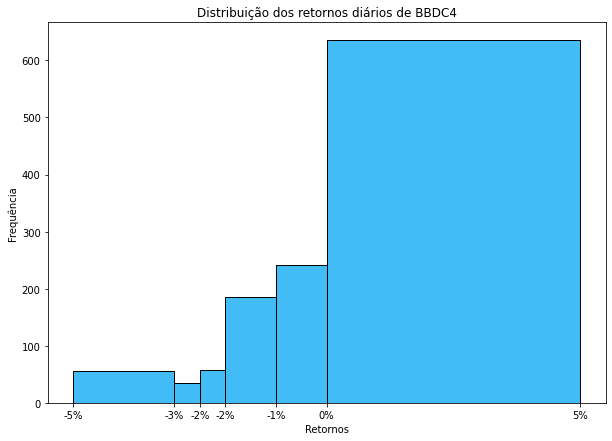

In [ ]:
bins = [-0.05,-0.03,-0.025,-0.02,-0.01,0,0.05]

fig, ax = plt.subplots(figsize=(10,7))
ax.hist(retorno_diario, bins = bins, color = '#42bcf5', edgecolor='k')

ax.set_xticks(bins)
import matplotlib.ticker as mtick
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax.set_xlabel('Retornos')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição dos retornos diários de BBDC4')
plt.show()

##### Histograma geral

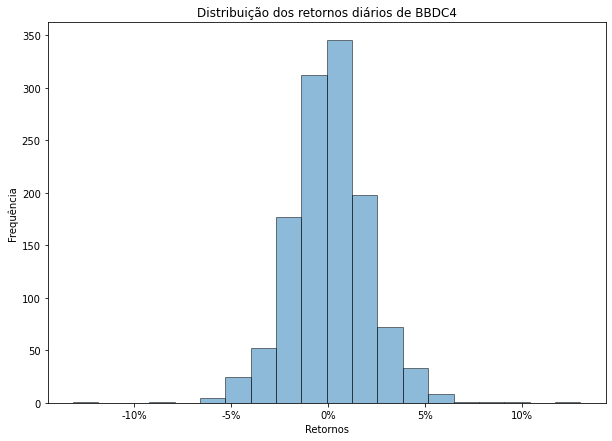

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
bins = 20
ax.hist(retorno_diario, bins = bins,edgecolor='k', alpha=0.5)

import matplotlib.ticker as mtick
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax.set_xlabel('Retornos')
ax.set_ylabel('Frequência')
ax.set_title('Distribuição dos retornos diários de BBDC4')
plt.show()

#### Análise Quinzenal

Vamos agora, analisar qual foi o retorno quinzenal da ação BBCD4 no período considerado de 5 anos

In [ ]:
q = h[::15]
len(q)

83

In [ ]:
#retorno quinzenal
retorno_q = []
for j in range(len(q)-1):
    retorno_q += [q[j+1]/q[j] - 1]

organizaremos esses retornos quinzenais em intervalos para posterior análise 

In [ ]:
#organização em caixas#
p = []
n1 = []
n2 = []
n3 = []
n4 = []
n5 = []
n6 = []
n7 = []
n8 = []
 
for j in retorno_q:
    if j >= 0:
        p+= [j]
    if -0.02 <= j < 0:
        n1+= [j]
    if  -0.04 <= j < -0.02:
        n2+= [j]
    if -0.06 <= j < -0.04:
        n3+= [j]
    if -0.08 <= j < -0.06:
        n4+= [j]
    if  -0.10 <= j < -0.08:
        n5+= [j]
    

k = len(p) + len(n1) + len(n2) + len(n3) + len(n4) + len(n5)    
l = [len(p)/k,len(n1)/k,len(n2)/k,len(n3)/k,len(n4)/k,len(n5)/k]
l

[0.6363636363636364,
 0.06493506493506493,
 0.12987012987012986,
 0.07792207792207792,
 0.05194805194805195,
 0.03896103896103896]

In [ ]:
sum(l)

1.0

In [ ]:
sum(l[0:4]) 

0.9090909090909092

In [ ]:
sum(l[0:5]) 

0.9610389610389611

Olhando para a distribuição à cima, vemos que para uma confiança de 95% o VaR é de aproximadamente -4% e para uma confiança de 90% o VaR é aproximadamente de -6%

##### Histogramas mais detalhados dos intervalos

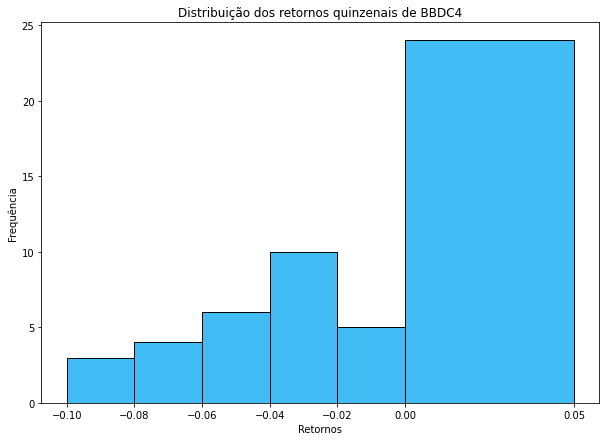

In [ ]:
bins = [-0.10,-0.08,-0.06,-0.04,-0.02,0,0.05]

plt.figure(figsize=(10,7))
plt.hist(retorno_q, bins = bins, color = '#42bcf5', edgecolor='k')
plt.xticks(bins)

plt.xlabel('Retornos')
plt.ylabel('Frequência')

plt.title('Distribuição dos retornos quinzenais de BBDC4')
plt.show()

##### Histogramas geral

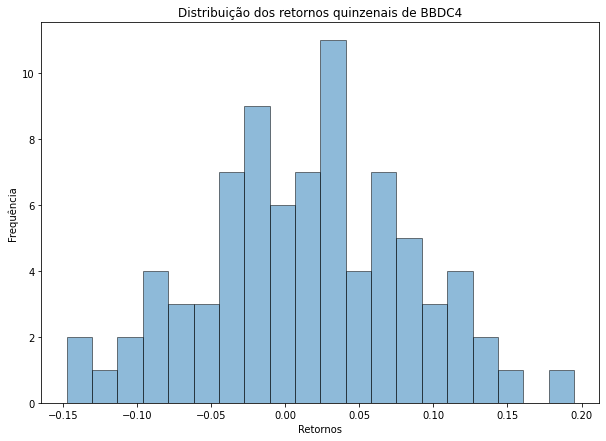

In [ ]:
bins = 20
plt.figure(figsize=(10,7))
plt.hist(retorno_q, bins = bins, edgecolor='k', alpha=0.5)

plt.xlabel('Retornos')
plt.ylabel('Frequência')
plt.title('Distribuição dos retornos quinzenais de BBDC4')

plt.show()

### Método da variância

Para o método da variância, calcularemos a média e o desvio padrão dos retornos (diários e quinzenais) e aproximaremos a distribuição para a normal padrão e aí sim, calcularemos o VaR para as confianças de 90% e 95% 

#### Diário

Calculando a média e o desvio padrão dos retornos diários da ação BBDC4 no período de 5 anos analisados

In [ ]:
u = sum(retorno_diario)/len(retorno_diario)

k = []
for i in retorno_diario:
    k+= [(i-u)**2]

std = ((1/(len(retorno_diario)-2))*sum(k))**(1/2)
u,std

(0.0009503834130892996, 0.020336080371225338)

Assumindo a distribuição como normal padrão, e fazendo o cálculo do VaR para as confianças de 90% e 95% teremos que:

In [ ]:
var95 = (u - std*1.64)*100
var90 = (u - std*1.28)*100

In [ ]:
var95,var90

(-3.2400788395720257, -2.5079799462079135)

Com isso, temos que para uma confiança de 95% teremos um VaR aproximado de -3,24% e para uma confiança de 90%, teremos um VaR também aproximado de -2,5%

Visualizando:

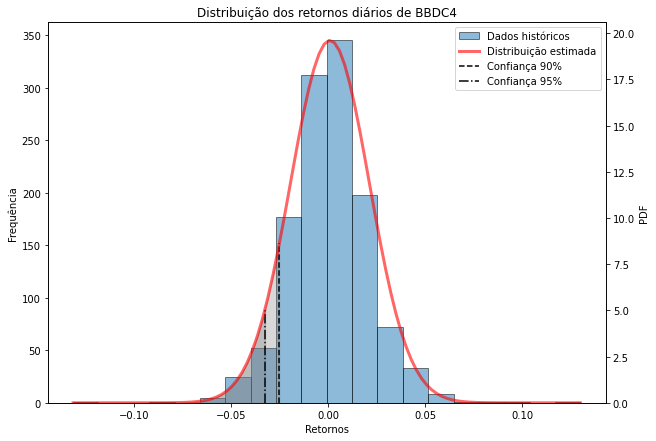

In [ ]:
# Histograma
bins = 20
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(retorno_diario, bins = bins, edgecolor='k', alpha=0.5,
        label='Dados históricos')

# Distribuição normal (PDF)
r_min = min(retorno_diario)
r_max = max(retorno_diario)
from scipy.stats import norm
y_nor = norm.pdf(np.linspace(r_min, r_max, 100), loc=u, scale=std)
ax2 = ax.twinx()
ax2.plot(np.linspace(r_min, r_max, 100),y_nor, c='r', alpha=0.6, linewidth='3', 
         label='Distribuição estimada')
ax2.set_ylim(bottom=0)

# Região de risco
x90 = var90/100
x95 = var95/100
y90 = norm.pdf(x90, loc=u, scale=std)
y95 = norm.pdf(x95, loc=u, scale=std)

x_area90 = np.linspace(r_min, x90)
y_area90 = norm.pdf(x_area90, loc=u, scale=std)
ax2.fill_between(x_area90, y_area90, color='grey', alpha=0.3)

x_area95 = np.linspace(r_min, x95)
y_area95 = norm.pdf(x_area95, loc=u, scale=std)
ax2.fill_between(x_area95, y_area95, color='grey', alpha=0.3)


ax2.vlines(x90, 0, y90, linestyle='--', label='Confiança 90%')
ax2.vlines(x95, 0, y95, linestyle='-.', label='Confiança 95%')

ax.set_xlabel('Retornos')
ax.set_ylabel('Frequência')
ax2.set_ylabel('PDF')
ax.set_title('Distribuição dos retornos diários de BBDC4')

# Legenda
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax.legend(lines, labels, loc=0)

plt.show()

#### Quinzenal

Calculando a média e o desvio padrão dos retornos quinzenais da ação BBDC4 no período de 5 anos analisado

In [ ]:
u_q = sum(retorno_q)/len(retorno_q)

k = []
for i in retorno_q:
    k+= [(i-u)**2]

std_q = ((1/(len(retorno_q)-2))*sum(k))**(1/2)
u_q,std_q

(0.013640318122960404, 0.07263493866341067)

Assumindo a distribuição como normal padrão, e fazendo o cálculo do VaR para as confianças de 90% e 95% teremos que:

In [ ]:
var95_q = (u_q - std_q*1.64)*100
var90_q = (u_q - std_q*1.28)*100

In [ ]:
var95_q,var90_q

(-10.548098128503309, -7.933240336620526)

Com isso, temos que para uma confiança de 95% teremos um VaR aproximado de -10,54% e para uma confiança de 90%, teremos um VaR também aproximado de -7,9%

Visualizando:

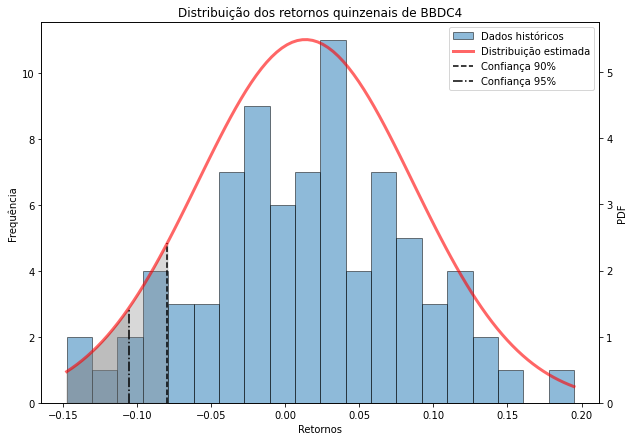

In [ ]:
# Histograma
bins = 20
u = u_q
std = std_q
fig, ax = plt.subplots(figsize=(10,7))
ax.hist(retorno_q, bins = bins, edgecolor='k', 
        alpha=0.5, label='Dados históricos')

# Distribuição normal (PDF)
r_min = min(retorno_q)
r_max = max(retorno_q)
from scipy.stats import norm
y_nor = norm.pdf(np.linspace(r_min, r_max, 100), loc=u, scale=std)
ax2 = ax.twinx()
ax2.plot(np.linspace(r_min, r_max, 100),y_nor, c='r', alpha=0.6, linewidth='3', 
         label='Distribuição estimada')
ax2.set_ylim(bottom=0)

# Região de risco
x90 = var90_q/100
x95 = var95_q/100
y90 = norm.pdf(x90, loc=u, scale=std)
y95 = norm.pdf(x95, loc=u, scale=std)

x_area90 = np.linspace(r_min, x90)
y_area90 = norm.pdf(x_area90, loc=u, scale=std)
ax2.fill_between(x_area90, y_area90, color='grey', alpha=0.3)

x_area95 = np.linspace(r_min, x95)
y_area95 = norm.pdf(x_area95, loc=u, scale=std)
ax2.fill_between(x_area95, y_area95, color='grey', alpha=0.3)

ax2.vlines(x90, 0, y90, linestyle='--', label='Confiança 90%')
ax2.vlines(x95, 0, y95, linestyle='-.', label='Confiança 95%')

ax.set_xlabel('Retornos')
ax.set_ylabel('Frequência')
ax2.set_ylabel('PDF')
ax.set_title('Distribuição dos retornos quinzenais de BBDC4')

# Legenda
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax.legend(lines, labels, loc=0)

plt.show()

## Conclusões

## Bibliografia

Cabral, M. A. P. **Finanças Matemáticas**: Teoria e Prática. 1 ed. 2020. Disponível em: Disponível em https://sites.google.com/matematica.ufrj.br/mapcabral/livro-finanças-matemática.